Dataset Link:https://www.kaggle.com/datasets/cdeotte/jpeg-isic2019-512x512

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets  download -d cdeotte/jpeg-isic2019-512x512

100% 1.38G/1.38G [01:14<00:00, 21.7MB/s]
100% 1.38G/1.38G [01:14<00:00, 19.8MB/s]


In [ ]:
import zipfile
a = zipfile.ZipFile('/content/jpeg-isic2019-512x512.zip','r')
a.extractall('/content/jpeg-isic2019-512x512')
a.close()

In [ ]:
import os
root_path = '/content/jpeg-isic2019-512x512/'
print(list(os.listdir(root_path)))

['train', 'train.csv']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read in training csv
import pandas as pd
meta = pd.read_csv('/content/jpeg-isic2019-512x512/train.csv')
print(meta)

         image_name  patient_id     sex  age_approx  \
0      ISIC_0000000          -1  female        55.0   
1      ISIC_0000001          -1  female        30.0   
2      ISIC_0000002          -1  female        60.0   
3      ISIC_0000003          -1    male        30.0   
4      ISIC_0000004          -1    male        80.0   
...             ...         ...     ...         ...   
25326  ISIC_0073247          -1  female        85.0   
25327  ISIC_0073248          -1    male        65.0   
25328  ISIC_0073249          -1    male        70.0   
25329  ISIC_0073251          -1  female        55.0   
25330  ISIC_0073254          -1    male        50.0   

      anatom_site_general_challenge diagnosis benign_malignant  target  \
0                    anterior torso        NV           benign       0   
1                    anterior torso        NV           benign       0   
2                   upper extremity       MEL        malignant       1   
3                   upper extremity        

In [ ]:
#Get diagnosis value counts
meta['diagnosis'].value_counts()

NV      12875
MEL      4522
BCC      3323
BKL      2624
AK        867
SCC       628
VASC      253
DF        239
Name: diagnosis, dtype: int64

In [ ]:
#Add a column with the path to each images jpeg
meta['path'] = root_path + 'train/' + meta['image_name'] + '.jpg'
print(meta)

         image_name  patient_id     sex  age_approx  \
0      ISIC_0000000          -1  female        55.0   
1      ISIC_0000001          -1  female        30.0   
2      ISIC_0000002          -1  female        60.0   
3      ISIC_0000003          -1    male        30.0   
4      ISIC_0000004          -1    male        80.0   
...             ...         ...     ...         ...   
25326  ISIC_0073247          -1  female        85.0   
25327  ISIC_0073248          -1    male        65.0   
25328  ISIC_0073249          -1    male        70.0   
25329  ISIC_0073251          -1  female        55.0   
25330  ISIC_0073254          -1    male        50.0   

      anatom_site_general_challenge diagnosis benign_malignant  target  \
0                    anterior torso        NV           benign       0   
1                    anterior torso        NV           benign       0   
2                   upper extremity       MEL        malignant       1   
3                   upper extremity        

In [ ]:

#Check target distribution
meta['diagnosis'].value_counts()

NV      12875
MEL      4522
BCC      3323
BKL      2624
AK        867
SCC       628
VASC      253
DF        239
Name: diagnosis, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(meta['diagnosis'])
LabelEncoder()
print(list(le.classes_))

['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC']


In [ ]:
meta['label']=le.transform(meta['diagnosis'])

In [ ]:
print(meta)

         image_name  patient_id     sex  age_approx  \
0      ISIC_0000000          -1  female        55.0   
1      ISIC_0000001          -1  female        30.0   
2      ISIC_0000002          -1  female        60.0   
3      ISIC_0000003          -1    male        30.0   
4      ISIC_0000004          -1    male        80.0   
...             ...         ...     ...         ...   
25326  ISIC_0073247          -1  female        85.0   
25327  ISIC_0073248          -1    male        65.0   
25328  ISIC_0073249          -1    male        70.0   
25329  ISIC_0073251          -1  female        55.0   
25330  ISIC_0073254          -1    male        50.0   

      anatom_site_general_challenge diagnosis benign_malignant  target  \
0                    anterior torso        NV           benign       0   
1                    anterior torso        NV           benign       0   
2                   upper extremity       MEL        malignant       1   
3                   upper extremity        

In [ ]:
#Check target distribution normalized
meta['label'].value_counts()

5    12875
4     4522
1     3323
2     2624
0      867
6      628
7      253
3      239
Name: label, dtype: int64

In [ ]:
from PIL import Image
meta['image']=meta['path'].map(lambda x:np.asarray(Image.open(x).resize((75,75))))

In [ ]:
print(meta['image'])

0        [[[179, 218, 250], [179, 216, 249], [179, 215,...
1        [[[173, 173, 182], [175, 175, 184], [177, 177,...
2        [[[64, 81, 114], [77, 95, 133], [88, 110, 147]...
3        [[[223, 222, 224], [223, 223, 227], [223, 224,...
4        [[[19, 19, 19], [19, 19, 19], [19, 19, 19], [1...
                               ...                        
25326    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
25327    [[[91, 86, 90], [97, 92, 96], [105, 98, 104], ...
25328    [[[127, 124, 128], [131, 127, 129], [131, 125,...
25329    [[[139, 118, 132], [141, 119, 133], [144, 122,...
25330    [[[212, 217, 219], [214, 222, 224], [214, 221,...
Name: image, Length: 25331, dtype: object


In [ ]:
import tensorflow as tf

x=np.asarray(meta['image'].tolist())
x=x/225
y=meta['label']
y_cat=tf.keras.utils.to_categorical(y,num_classes=8)

In [ ]:
print(x)

[[[[0.79555556 0.96888889 1.11111111]
   [0.79555556 0.96       1.10666667]
   [0.79555556 0.95555556 1.10666667]
   ...
   [0.79111111 0.97333333 1.11111111]
   [0.79111111 0.98222222 1.11111111]
   [0.79111111 0.98666667 1.11111111]]

  [[0.77777778 0.94666667 1.12444444]
   [0.77333333 0.94222222 1.12      ]
   [0.76888889 0.93333333 1.11555556]
   ...
   [0.76       0.96444444 1.12888889]
   [0.76       0.96888889 1.12444444]
   [0.75555556 0.96888889 1.12888889]]

  [[0.77777778 0.94666667 1.12      ]
   [0.77333333 0.94222222 1.11555556]
   [0.77333333 0.93777778 1.11555556]
   ...
   [0.76       0.96       1.12444444]
   [0.76444444 0.96444444 1.12888889]
   [0.76       0.96888889 1.12444444]]

  ...

  [[0.78666667 0.98222222 1.13333333]
   [0.79111111 0.98666667 1.13333333]
   [0.78666667 0.98222222 1.13333333]
   ...
   [0.80444444 1.00444444 1.13333333]
   [0.8        1.00444444 1.12888889]
   [0.80444444 1.         1.12888889]]

  [[0.77333333 0.98666667 1.12888889]
   [0.7

In [ ]:
print(y_cat)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [ ]:
random_seed=42
x_train,x_test,y_train,y_test=train_test_split(x,y_cat,test_size=0.3,random_state=42)

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop

BASIC CNN

In [ ]:
def build_cnn_model(input_shape = (75, 75, 3), num_classes=2):
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3,3), padding='Same', input_shape = input_shape, activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size = (2,2)))



    model.add(Conv2D(32, kernel_size=(4,4), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(64, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_initializer='normal'))
    model.add(Dense(8, activation = 'softmax'))
    model.summary()
    optimizer= Adam(lr=0.001)

    model.compile(optimizer = optimizer, loss='categorical_crossentropy', metrics=["accuracy"])

    return model

In [ ]:
model_cnn = build_cnn_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 64)         0

In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                         factor=0.5,
                                          min_lr = 1e-4)

history = model_cnn.fit(x_train,y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(x_test,y_test))

Epoch 1/50
278/278 [==============================] - ETA: 0s - loss: 1.2758 - accuracy: 0.5427

278/278 [==============================] - 12s 11ms/step - loss: 1.2758 - accuracy: 0.5427 - val_loss: 1.1927 - val_accuracy: 0.5746 - lr: 0.0010
Epoch 2/50
271/278 [============================>.] - ETA: 0s - loss: 1.1530 - accuracy: 0.5856

278/278 [==============================] - 2s 7ms/step - loss: 1.1537 - accuracy: 0.5852 - val_loss: 1.1119 - val_accuracy: 0.5979 - lr: 0.0010
Epoch 3/50
271/278 [============================>.] - ETA: 0s - loss: 1.1045 - accuracy: 0.6012

278/278 [==============================] - 2s 7ms/step - loss: 1.1041 - accuracy: 0.6018 - val_loss: 1.0853 - val_accuracy: 0.6068 - lr: 0.0010
Epoch 4/50
272/278 [============================>.] - ETA: 0s - loss: 1.0587 - accuracy: 0.6147

278/278 [==============================] - 2s 7ms/step - loss: 1.0586 - accuracy: 0.6151 - val_loss: 1.0721 - val_accuracy: 0.6174 - lr: 0.0010
Epoch 5/50
271/278 [============================>.] - ETA: 0s - loss: 1.0296 - accuracy: 0.6265

278/278 [==============================] - 2s 7ms/step - loss: 1.0312 - accuracy: 0.6257 - val_loss: 1.0448 - val_accuracy: 0.6297 - lr: 0.0010
Epoch 6/50
274/278 [============================>.] - ETA: 0s - loss: 0.9867 - accuracy: 0.6427

278/278 [==============================] - 2s 7ms/step - loss: 0.9869 - accuracy: 0.6426 - val_loss: 1.0084 - val_accuracy: 0.6388 - lr: 0.0010
Epoch 7/50
277/278 [============================>.] - ETA: 0s - loss: 0.9495 - accuracy: 0.6522

278/278 [==============================] - 2s 8ms/step - loss: 0.9495 - accuracy: 0.6523 - val_loss: 1.0416 - val_accuracy: 0.6272 - lr: 0.0010
Epoch 8/50
271/278 [============================>.] - ETA: 0s - loss: 0.9303 - accuracy: 0.6591

278/278 [==============================] - 2s 8ms/step - loss: 0.9287 - accuracy: 0.6600 - val_loss: 1.0137 - val_accuracy: 0.6332 - lr: 0.0010
Epoch 9/50
278/278 [==============================] - ETA: 0s - loss: 0.8842 - accuracy: 0.6786

278/278 [==============================] - 2s 8ms/step - loss: 0.8842 - accuracy: 0.6786 - val_loss: 1.0181 - val_accuracy: 0.6407 - lr: 0.0010
Epoch 10/50
271/278 [============================>.] - ETA: 0s - loss: 0.8644 - accuracy: 0.6846

278/278 [==============================] - 2s 8ms/step - loss: 0.8636 - accuracy: 0.6851 - val_loss: 1.0075 - val_accuracy: 0.6430 - lr: 0.0010
Epoch 11/50
271/278 [============================>.] - ETA: 0s - loss: 0.8016 - accuracy: 0.7057

278/278 [==============================] - 2s 8ms/step - loss: 0.7992 - accuracy: 0.7067 - val_loss: 1.0766 - val_accuracy: 0.6350 - lr: 0.0010
Epoch 12/50
270/278 [============================>.] - ETA: 0s - loss: 0.7557 - accuracy: 0.7231

278/278 [==============================] - 2s 8ms/step - loss: 0.7573 - accuracy: 0.7230 - val_loss: 1.0573 - val_accuracy: 0.6395 - lr: 0.0010
Epoch 13/50
271/278 [============================>.] - ETA: 0s - loss: 0.7079 - accuracy: 0.7395

278/278 [==============================] - 2s 8ms/step - loss: 0.7082 - accuracy: 0.7395 - val_loss: 1.0882 - val_accuracy: 0.6470 - lr: 0.0010
Epoch 14/50
271/278 [============================>.] - ETA: 0s - loss: 0.6537 - accuracy: 0.7602

278/278 [==============================] - 2s 8ms/step - loss: 0.6554 - accuracy: 0.7589 - val_loss: 1.1790 - val_accuracy: 0.6329 - lr: 0.0010
Epoch 15/50
270/278 [============================>.] - ETA: 0s - loss: 0.6133 - accuracy: 0.7740

278/278 [==============================] - 2s 8ms/step - loss: 0.6136 - accuracy: 0.7740 - val_loss: 1.1847 - val_accuracy: 0.6383 - lr: 0.0010
Epoch 16/50
271/278 [============================>.] - ETA: 0s - loss: 0.5534 - accuracy: 0.8007

278/278 [==============================] - 2s 8ms/step - loss: 0.5512 - accuracy: 0.8011 - val_loss: 1.2767 - val_accuracy: 0.6334 - lr: 0.0010
Epoch 17/50
278/278 [==============================] - ETA: 0s - loss: 0.4883 - accuracy: 0.8210

278/278 [==============================] - 2s 8ms/step - loss: 0.4883 - accuracy: 0.8210 - val_loss: 1.2910 - val_accuracy: 0.6286 - lr: 0.0010
Epoch 18/50
270/278 [============================>.] - ETA: 0s - loss: 0.4250 - accuracy: 0.8517

278/278 [==============================] - 2s 8ms/step - loss: 0.4250 - accuracy: 0.8516 - val_loss: 1.4818 - val_accuracy: 0.6346 - lr: 0.0010
Epoch 19/50
276/278 [============================>.] - ETA: 0s - loss: 0.3740 - accuracy: 0.8666

278/278 [==============================] - 2s 8ms/step - loss: 0.3738 - accuracy: 0.8666 - val_loss: 1.4303 - val_accuracy: 0.6366 - lr: 0.0010
Epoch 20/50
269/278 [============================>.] - ETA: 0s - loss: 0.3263 - accuracy: 0.8861

278/278 [==============================] - 2s 8ms/step - loss: 0.3273 - accuracy: 0.8857 - val_loss: 1.6047 - val_accuracy: 0.6205 - lr: 0.0010
Epoch 21/50
278/278 [==============================] - ETA: 0s - loss: 0.2822 - accuracy: 0.9005

278/278 [==============================] - 2s 8ms/step - loss: 0.2822 - accuracy: 0.9005 - val_loss: 1.6587 - val_accuracy: 0.6262 - lr: 0.0010
Epoch 22/50
270/278 [============================>.] - ETA: 0s - loss: 0.2529 - accuracy: 0.9119

278/278 [==============================] - 2s 8ms/step - loss: 0.2550 - accuracy: 0.9107 - val_loss: 1.8205 - val_accuracy: 0.6325 - lr: 0.0010
Epoch 23/50
274/278 [============================>.] - ETA: 0s - loss: 0.2180 - accuracy: 0.9237

278/278 [==============================] - 2s 7ms/step - loss: 0.2176 - accuracy: 0.9238 - val_loss: 1.9938 - val_accuracy: 0.6270 - lr: 0.0010
Epoch 24/50
272/278 [============================>.] - ETA: 0s - loss: 0.1921 - accuracy: 0.9325

278/278 [==============================] - 2s 7ms/step - loss: 0.1927 - accuracy: 0.9324 - val_loss: 2.0255 - val_accuracy: 0.5991 - lr: 0.0010
Epoch 25/50
274/278 [============================>.] - ETA: 0s - loss: 0.1627 - accuracy: 0.9432

278/278 [==============================] - 2s 7ms/step - loss: 0.1626 - accuracy: 0.9433 - val_loss: 2.2614 - val_accuracy: 0.6225 - lr: 0.0010
Epoch 26/50
272/278 [============================>.] - ETA: 0s - loss: 0.1311 - accuracy: 0.9559

278/278 [==============================] - 2s 7ms/step - loss: 0.1313 - accuracy: 0.9559 - val_loss: 2.5314 - val_accuracy: 0.6183 - lr: 0.0010
Epoch 27/50
275/278 [============================>.] - ETA: 0s - loss: 0.1481 - accuracy: 0.9477

278/278 [==============================] - 2s 7ms/step - loss: 0.1479 - accuracy: 0.9479 - val_loss: 2.5465 - val_accuracy: 0.6232 - lr: 0.0010
Epoch 28/50
278/278 [==============================] - ETA: 0s - loss: 0.1231 - accuracy: 0.9583

278/278 [==============================] - 2s 7ms/step - loss: 0.1231 - accuracy: 0.9583 - val_loss: 2.5915 - val_accuracy: 0.6161 - lr: 0.0010
Epoch 29/50
271/278 [============================>.] - ETA: 0s - loss: 0.0992 - accuracy: 0.9667

278/278 [==============================] - 2s 8ms/step - loss: 0.0992 - accuracy: 0.9668 - val_loss: 2.8002 - val_accuracy: 0.6249 - lr: 0.0010
Epoch 30/50
276/278 [============================>.] - ETA: 0s - loss: 0.0884 - accuracy: 0.9707

278/278 [==============================] - 2s 8ms/step - loss: 0.0894 - accuracy: 0.9704 - val_loss: 3.0435 - val_accuracy: 0.6120 - lr: 0.0010
Epoch 31/50
278/278 [==============================] - ETA: 0s - loss: 0.1798 - accuracy: 0.9407

278/278 [==============================] - 2s 8ms/step - loss: 0.1798 - accuracy: 0.9407 - val_loss: 2.8242 - val_accuracy: 0.6212 - lr: 0.0010
Epoch 32/50
270/278 [============================>.] - ETA: 0s - loss: 0.0656 - accuracy: 0.9783

278/278 [==============================] - 2s 8ms/step - loss: 0.0661 - accuracy: 0.9782 - val_loss: 3.0877 - val_accuracy: 0.6189 - lr: 0.0010
Epoch 33/50
271/278 [============================>.] - ETA: 0s - loss: 0.0529 - accuracy: 0.9828

278/278 [==============================] - 2s 8ms/step - loss: 0.0531 - accuracy: 0.9827 - val_loss: 3.1902 - val_accuracy: 0.6238 - lr: 0.0010
Epoch 34/50
271/278 [============================>.] - ETA: 0s - loss: 0.0801 - accuracy: 0.9715

278/278 [==============================] - 2s 8ms/step - loss: 0.0816 - accuracy: 0.9708 - val_loss: 3.0164 - val_accuracy: 0.6075 - lr: 0.0010
Epoch 35/50
270/278 [============================>.] - ETA: 0s - loss: 0.0950 - accuracy: 0.9681

278/278 [==============================] - 2s 8ms/step - loss: 0.0940 - accuracy: 0.9684 - val_loss: 3.1189 - val_accuracy: 0.6184 - lr: 0.0010
Epoch 36/50
271/278 [============================>.] - ETA: 0s - loss: 0.0527 - accuracy: 0.9821

278/278 [==============================] - 2s 8ms/step - loss: 0.0538 - accuracy: 0.9817 - val_loss: 3.5886 - val_accuracy: 0.6166 - lr: 0.0010
Epoch 37/50
270/278 [============================>.] - ETA: 0s - loss: 0.0894 - accuracy: 0.9701

278/278 [==============================] - 2s 8ms/step - loss: 0.0887 - accuracy: 0.9704 - val_loss: 3.5510 - val_accuracy: 0.6195 - lr: 0.0010
Epoch 38/50
270/278 [============================>.] - ETA: 0s - loss: 0.1056 - accuracy: 0.9662

278/278 [==============================] - 2s 8ms/step - loss: 0.1046 - accuracy: 0.9664 - val_loss: 3.3048 - val_accuracy: 0.6257 - lr: 0.0010
Epoch 39/50
276/278 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9924

278/278 [==============================] - 2s 8ms/step - loss: 0.0259 - accuracy: 0.9924 - val_loss: 3.6058 - val_accuracy: 0.6222 - lr: 0.0010
Epoch 40/50
277/278 [============================>.] - ETA: 0s - loss: 0.0525 - accuracy: 0.9831

278/278 [==============================] - 2s 8ms/step - loss: 0.0525 - accuracy: 0.9831 - val_loss: 3.4806 - val_accuracy: 0.6214 - lr: 0.0010
Epoch 41/50
277/278 [============================>.] - ETA: 0s - loss: 0.0768 - accuracy: 0.9752

278/278 [==============================] - 2s 8ms/step - loss: 0.0768 - accuracy: 0.9752 - val_loss: 3.5811 - val_accuracy: 0.6182 - lr: 0.0010
Epoch 42/50
278/278 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9864

278/278 [==============================] - 2s 8ms/step - loss: 0.0421 - accuracy: 0.9864 - val_loss: 3.7768 - val_accuracy: 0.6189 - lr: 0.0010
Epoch 43/50
270/278 [============================>.] - ETA: 0s - loss: 0.0520 - accuracy: 0.9833

278/278 [==============================] - 2s 8ms/step - loss: 0.0533 - accuracy: 0.9827 - val_loss: 3.7275 - val_accuracy: 0.6128 - lr: 0.0010
Epoch 44/50
271/278 [============================>.] - ETA: 0s - loss: 0.0515 - accuracy: 0.9829

278/278 [==============================] - 2s 7ms/step - loss: 0.0517 - accuracy: 0.9828 - val_loss: 4.1044 - val_accuracy: 0.6278 - lr: 0.0010
Epoch 45/50
277/278 [============================>.] - ETA: 0s - loss: 0.0814 - accuracy: 0.9727

278/278 [==============================] - 2s 7ms/step - loss: 0.0813 - accuracy: 0.9727 - val_loss: 3.7858 - val_accuracy: 0.6218 - lr: 0.0010
Epoch 46/50
272/278 [============================>.] - ETA: 0s - loss: 0.0719 - accuracy: 0.9781

278/278 [==============================] - 2s 7ms/step - loss: 0.0726 - accuracy: 0.9779 - val_loss: 4.0116 - val_accuracy: 0.6208 - lr: 0.0010
Epoch 47/50
273/278 [============================>.] - ETA: 0s - loss: 0.0636 - accuracy: 0.9800

278/278 [==============================] - 2s 7ms/step - loss: 0.0642 - accuracy: 0.9798 - val_loss: 4.0503 - val_accuracy: 0.6093 - lr: 0.0010
Epoch 48/50
275/278 [============================>.] - ETA: 0s - loss: 0.0610 - accuracy: 0.9802

278/278 [==============================] - 2s 7ms/step - loss: 0.0611 - accuracy: 0.9801 - val_loss: 4.0879 - val_accuracy: 0.6209 - lr: 0.0010
Epoch 49/50
273/278 [============================>.] - ETA: 0s - loss: 0.0264 - accuracy: 0.9924

278/278 [==============================] - 2s 7ms/step - loss: 0.0267 - accuracy: 0.9923 - val_loss: 4.0622 - val_accuracy: 0.6138 - lr: 0.0010
Epoch 50/50
272/278 [============================>.] - ETA: 0s - loss: 0.0347 - accuracy: 0.9889

278/278 [==============================] - 2s 7ms/step - loss: 0.0347 - accuracy: 0.9889 - val_loss: 4.1967 - val_accuracy: 0.6196 - lr: 0.0010


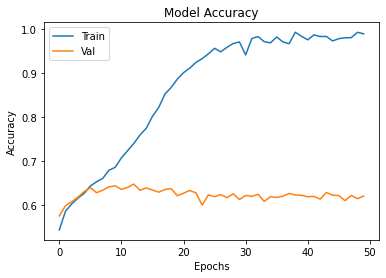

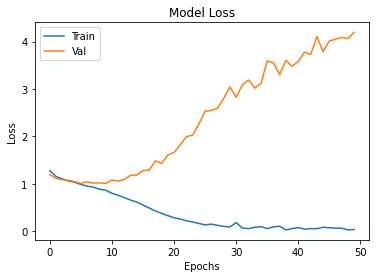

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 64)         0

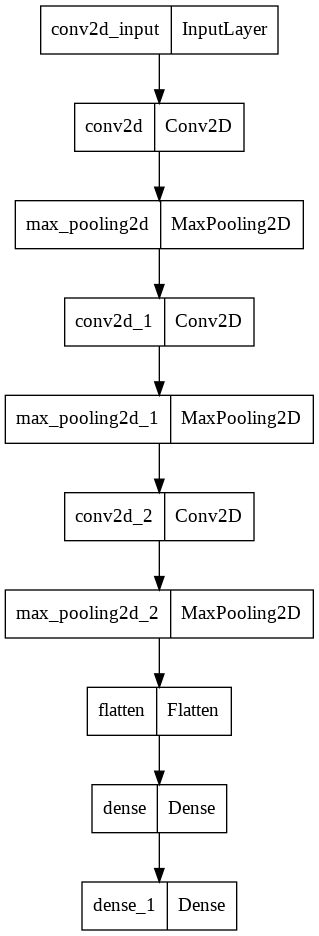

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_cnn)

GOOGLE NET

In [ ]:
import keras
from keras.applications import InceptionV3 #GoogleNet

In [ ]:
model1=InceptionV3(input_shape=(75, 75, 3),weights="imagenet",include_top=False)

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
def build_cnn_model(input_shape = (75, 75, 3), num_classes=2):
  model = Sequential() # layer has 1 i/p and 1 o/p
  model.add(model1)
  model.add(Flatten())
  model.add(keras.layers.Dense(128,activation="relu"))
  model.add(keras.layers.Dense(8,activation="sigmoid"))
  model.summary()
  optimizer= Adam(lr=0.001)

  model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])

  return model

In [ ]:
model_cnn = build_cnn_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 22,066,088
Trainable params: 22,031,656
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                         factor=0.5,
                                          min_lr = 1e-4)

history = model_cnn.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(x_test,y_test))

Epoch 1/50
278/278 [==============================] - ETA: 0s - loss: 0.2368 - accuracy: 0.5990

278/278 [==============================] - 26s 64ms/step - loss: 0.2368 - accuracy: 0.5990 - val_loss: 0.2553 - val_accuracy: 0.6134 - lr: 0.0010
Epoch 2/50
278/278 [==============================] - ETA: 0s - loss: 0.2092 - accuracy: 0.6433

278/278 [==============================] - 15s 54ms/step - loss: 0.2092 - accuracy: 0.6433 - val_loss: 0.3543 - val_accuracy: 0.6624 - lr: 0.0010
Epoch 3/50
277/278 [============================>.] - ETA: 0s - loss: 0.1981 - accuracy: 0.6659

278/278 [==============================] - 15s 54ms/step - loss: 0.1982 - accuracy: 0.6658 - val_loss: 0.3331 - val_accuracy: 0.4680 - lr: 0.0010
Epoch 4/50
278/278 [==============================] - ETA: 0s - loss: 0.1942 - accuracy: 0.6597

278/278 [==============================] - 15s 53ms/step - loss: 0.1942 - accuracy: 0.6597 - val_loss: 0.2391 - val_accuracy: 0.5729 - lr: 0.0010
Epoch 5/50
278/278 [==============================] - ETA: 0s - loss: 0.1758 - accuracy: 0.6989

278/278 [==============================] - 15s 53ms/step - loss: 0.1758 - accuracy: 0.6989 - val_loss: 0.2173 - val_accuracy: 0.6392 - lr: 0.0010
Epoch 6/50
277/278 [============================>.] - ETA: 0s - loss: 0.1650 - accuracy: 0.7191

278/278 [==============================] - 15s 54ms/step - loss: 0.1651 - accuracy: 0.7191 - val_loss: 0.2159 - val_accuracy: 0.6361 - lr: 0.0010
Epoch 7/50
278/278 [==============================] - ETA: 0s - loss: 0.1505 - accuracy: 0.7454

278/278 [==============================] - 15s 53ms/step - loss: 0.1505 - accuracy: 0.7454 - val_loss: 0.1932 - val_accuracy: 0.6749 - lr: 0.0010
Epoch 8/50
278/278 [==============================] - ETA: 0s - loss: 0.1428 - accuracy: 0.7599

278/278 [==============================] - 15s 54ms/step - loss: 0.1428 - accuracy: 0.7599 - val_loss: 0.2393 - val_accuracy: 0.6547 - lr: 0.0010
Epoch 9/50
277/278 [============================>.] - ETA: 0s - loss: 0.1329 - accuracy: 0.7806

278/278 [==============================] - 15s 54ms/step - loss: 0.1329 - accuracy: 0.7807 - val_loss: 0.2312 - val_accuracy: 0.6136 - lr: 0.0010
Epoch 10/50
277/278 [============================>.] - ETA: 0s - loss: 0.1122 - accuracy: 0.8194

278/278 [==============================] - 15s 54ms/step - loss: 0.1123 - accuracy: 0.8194 - val_loss: 0.2093 - val_accuracy: 0.6787 - lr: 0.0010
Epoch 11/50
277/278 [============================>.] - ETA: 0s - loss: 0.1028 - accuracy: 0.8388

278/278 [==============================] - 15s 53ms/step - loss: 0.1028 - accuracy: 0.8388 - val_loss: 0.2852 - val_accuracy: 0.6087 - lr: 0.0010
Epoch 12/50
277/278 [============================>.] - ETA: 0s - loss: 0.1149 - accuracy: 0.8196

278/278 [==============================] - 15s 54ms/step - loss: 0.1149 - accuracy: 0.8196 - val_loss: 22.0963 - val_accuracy: 0.5182 - lr: 0.0010
Epoch 13/50
277/278 [============================>.] - ETA: 0s - loss: 0.0902 - accuracy: 0.8639

278/278 [==============================] - 15s 54ms/step - loss: 0.0903 - accuracy: 0.8638 - val_loss: 0.8036 - val_accuracy: 0.4320 - lr: 0.0010
Epoch 14/50
277/278 [============================>.] - ETA: 0s - loss: 0.0754 - accuracy: 0.8861

278/278 [==============================] - 15s 53ms/step - loss: 0.0754 - accuracy: 0.8860 - val_loss: 0.2649 - val_accuracy: 0.6830 - lr: 0.0010
Epoch 15/50
278/278 [==============================] - ETA: 0s - loss: 0.0862 - accuracy: 0.8701

278/278 [==============================] - 15s 54ms/step - loss: 0.0862 - accuracy: 0.8701 - val_loss: 0.2619 - val_accuracy: 0.6697 - lr: 0.0010
Epoch 16/50
278/278 [==============================] - ETA: 0s - loss: 0.0569 - accuracy: 0.9182

278/278 [==============================] - 15s 53ms/step - loss: 0.0569 - accuracy: 0.9182 - val_loss: 0.2722 - val_accuracy: 0.6780 - lr: 0.0010
Epoch 17/50
277/278 [============================>.] - ETA: 0s - loss: 0.0458 - accuracy: 0.9358

278/278 [==============================] - 15s 53ms/step - loss: 0.0458 - accuracy: 0.9358 - val_loss: 0.3309 - val_accuracy: 0.6742 - lr: 0.0010
Epoch 18/50
277/278 [============================>.] - ETA: 0s - loss: 0.0408 - accuracy: 0.9405

278/278 [==============================] - 15s 54ms/step - loss: 0.0409 - accuracy: 0.9405 - val_loss: 0.8570 - val_accuracy: 0.6554 - lr: 0.0010
Epoch 19/50
277/278 [============================>.] - ETA: 0s - loss: 0.0426 - accuracy: 0.9400

278/278 [==============================] - 15s 54ms/step - loss: 0.0426 - accuracy: 0.9400 - val_loss: 0.2916 - val_accuracy: 0.6689 - lr: 0.0010
Epoch 20/50
277/278 [============================>.] - ETA: 0s - loss: 0.0420 - accuracy: 0.9407

278/278 [==============================] - 15s 53ms/step - loss: 0.0422 - accuracy: 0.9406 - val_loss: 0.2807 - val_accuracy: 0.6922 - lr: 0.0010
Epoch 21/50
278/278 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9667

278/278 [==============================] - 15s 54ms/step - loss: 0.0245 - accuracy: 0.9667 - val_loss: 0.3514 - val_accuracy: 0.6736 - lr: 0.0010
Epoch 22/50
277/278 [============================>.] - ETA: 0s - loss: 0.0257 - accuracy: 0.9645

278/278 [==============================] - 15s 56ms/step - loss: 0.0258 - accuracy: 0.9644 - val_loss: 0.3142 - val_accuracy: 0.6822 - lr: 0.0010
Epoch 23/50
277/278 [============================>.] - ETA: 0s - loss: 0.0282 - accuracy: 0.9607

278/278 [==============================] - 15s 55ms/step - loss: 0.0282 - accuracy: 0.9607 - val_loss: 0.3435 - val_accuracy: 0.6737 - lr: 0.0010
Epoch 24/50
278/278 [==============================] - ETA: 0s - loss: 0.0221 - accuracy: 0.9686

278/278 [==============================] - 15s 56ms/step - loss: 0.0221 - accuracy: 0.9686 - val_loss: 0.3265 - val_accuracy: 0.6770 - lr: 0.0010
Epoch 25/50
278/278 [==============================] - ETA: 0s - loss: 0.0194 - accuracy: 0.9732

278/278 [==============================] - 15s 55ms/step - loss: 0.0194 - accuracy: 0.9732 - val_loss: 0.3254 - val_accuracy: 0.6737 - lr: 0.0010
Epoch 26/50
277/278 [============================>.] - ETA: 0s - loss: 0.0614 - accuracy: 0.9092

278/278 [==============================] - 15s 55ms/step - loss: 0.0614 - accuracy: 0.9092 - val_loss: 0.3059 - val_accuracy: 0.6786 - lr: 0.0010
Epoch 27/50
278/278 [==============================] - ETA: 0s - loss: 0.0325 - accuracy: 0.9545

278/278 [==============================] - 15s 55ms/step - loss: 0.0325 - accuracy: 0.9545 - val_loss: 0.3128 - val_accuracy: 0.6950 - lr: 0.0010
Epoch 28/50
277/278 [============================>.] - ETA: 0s - loss: 0.0512 - accuracy: 0.9245

278/278 [==============================] - 16s 56ms/step - loss: 0.0513 - accuracy: 0.9244 - val_loss: 0.2982 - val_accuracy: 0.5964 - lr: 0.0010
Epoch 29/50
278/278 [==============================] - ETA: 0s - loss: 0.0382 - accuracy: 0.9437

278/278 [==============================] - 15s 56ms/step - loss: 0.0382 - accuracy: 0.9437 - val_loss: 0.3073 - val_accuracy: 0.6904 - lr: 0.0010
Epoch 30/50
278/278 [==============================] - ETA: 0s - loss: 0.0902 - accuracy: 0.8632

278/278 [==============================] - 16s 56ms/step - loss: 0.0902 - accuracy: 0.8632 - val_loss: 0.2774 - val_accuracy: 0.6803 - lr: 0.0010
Epoch 31/50
277/278 [============================>.] - ETA: 0s - loss: 0.0448 - accuracy: 0.9354

278/278 [==============================] - 15s 56ms/step - loss: 0.0451 - accuracy: 0.9353 - val_loss: 0.2790 - val_accuracy: 0.6928 - lr: 0.0010
Epoch 32/50
277/278 [============================>.] - ETA: 0s - loss: 0.0240 - accuracy: 0.9672

278/278 [==============================] - 15s 56ms/step - loss: 0.0240 - accuracy: 0.9671 - val_loss: 0.3121 - val_accuracy: 0.6967 - lr: 0.0010
Epoch 33/50
278/278 [==============================] - ETA: 0s - loss: 0.0116 - accuracy: 0.9844

278/278 [==============================] - 15s 56ms/step - loss: 0.0116 - accuracy: 0.9844 - val_loss: 0.3301 - val_accuracy: 0.6738 - lr: 0.0010
Epoch 34/50
278/278 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9832

278/278 [==============================] - 15s 55ms/step - loss: 0.0131 - accuracy: 0.9832 - val_loss: 0.3563 - val_accuracy: 0.6941 - lr: 0.0010
Epoch 35/50
277/278 [============================>.] - ETA: 0s - loss: 0.0130 - accuracy: 0.9824

278/278 [==============================] - 15s 55ms/step - loss: 0.0132 - accuracy: 0.9822 - val_loss: 0.3375 - val_accuracy: 0.6761 - lr: 0.0010
Epoch 36/50
277/278 [============================>.] - ETA: 0s - loss: 0.0177 - accuracy: 0.9769

278/278 [==============================] - 15s 55ms/step - loss: 0.0178 - accuracy: 0.9768 - val_loss: 0.3567 - val_accuracy: 0.6813 - lr: 0.0010
Epoch 37/50
278/278 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 0.9600

278/278 [==============================] - 15s 54ms/step - loss: 0.0294 - accuracy: 0.9600 - val_loss: 0.3293 - val_accuracy: 0.6771 - lr: 0.0010
Epoch 38/50
277/278 [============================>.] - ETA: 0s - loss: 0.0110 - accuracy: 0.9856

278/278 [==============================] - 15s 53ms/step - loss: 0.0110 - accuracy: 0.9856 - val_loss: 0.3236 - val_accuracy: 0.6918 - lr: 0.0010
Epoch 39/50
278/278 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9842

278/278 [==============================] - 15s 54ms/step - loss: 0.0124 - accuracy: 0.9842 - val_loss: 0.3328 - val_accuracy: 0.7014 - lr: 0.0010
Epoch 40/50
277/278 [============================>.] - ETA: 0s - loss: 0.0137 - accuracy: 0.9831

278/278 [==============================] - 15s 54ms/step - loss: 0.0137 - accuracy: 0.9830 - val_loss: 0.3444 - val_accuracy: 0.6718 - lr: 0.0010
Epoch 41/50
278/278 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9794

278/278 [==============================] - 15s 53ms/step - loss: 0.0158 - accuracy: 0.9794 - val_loss: 0.3353 - val_accuracy: 0.6987 - lr: 0.0010
Epoch 42/50
277/278 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9876

278/278 [==============================] - 15s 54ms/step - loss: 0.0094 - accuracy: 0.9875 - val_loss: 0.3252 - val_accuracy: 0.6986 - lr: 0.0010
Epoch 43/50
277/278 [============================>.] - ETA: 0s - loss: 0.0105 - accuracy: 0.9861

278/278 [==============================] - 15s 54ms/step - loss: 0.0106 - accuracy: 0.9860 - val_loss: 0.4288 - val_accuracy: 0.6621 - lr: 0.0010
Epoch 44/50
277/278 [============================>.] - ETA: 0s - loss: 0.0118 - accuracy: 0.9848

278/278 [==============================] - 15s 53ms/step - loss: 0.0118 - accuracy: 0.9848 - val_loss: 0.3479 - val_accuracy: 0.6953 - lr: 0.0010
Epoch 45/50
277/278 [============================>.] - ETA: 0s - loss: 0.0114 - accuracy: 0.9847

278/278 [==============================] - 15s 54ms/step - loss: 0.0114 - accuracy: 0.9847 - val_loss: 0.3523 - val_accuracy: 0.6936 - lr: 0.0010
Epoch 46/50
278/278 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.9889

278/278 [==============================] - 15s 54ms/step - loss: 0.0080 - accuracy: 0.9889 - val_loss: 0.3471 - val_accuracy: 0.7041 - lr: 0.0010
Epoch 47/50
277/278 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9744

278/278 [==============================] - 15s 53ms/step - loss: 0.0190 - accuracy: 0.9743 - val_loss: 0.3626 - val_accuracy: 0.6961 - lr: 0.0010
Epoch 48/50
277/278 [============================>.] - ETA: 0s - loss: 0.1234 - accuracy: 0.8028

278/278 [==============================] - 15s 54ms/step - loss: 0.1236 - accuracy: 0.8028 - val_loss: 0.2295 - val_accuracy: 0.6761 - lr: 0.0010
Epoch 49/50
277/278 [============================>.] - ETA: 0s - loss: 0.0398 - accuracy: 0.9421

278/278 [==============================] - 15s 54ms/step - loss: 0.0398 - accuracy: 0.9421 - val_loss: 0.2767 - val_accuracy: 0.6970 - lr: 0.0010
Epoch 50/50
277/278 [============================>.] - ETA: 0s - loss: 0.0181 - accuracy: 0.9750

278/278 [==============================] - 15s 53ms/step - loss: 0.0183 - accuracy: 0.9748 - val_loss: 0.3288 - val_accuracy: 0.7020 - lr: 0.0010


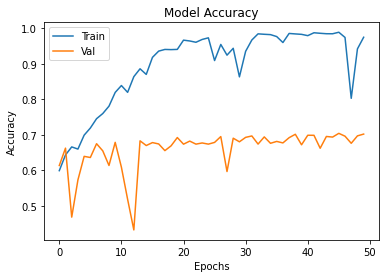

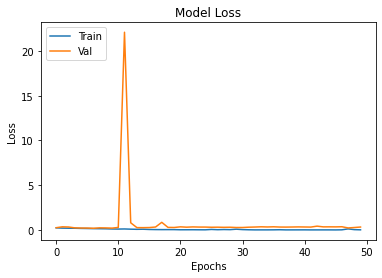

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 22,066,088
Trainable params: 22,031,656
Non-trainable params: 34,432
_________________________________________________________________


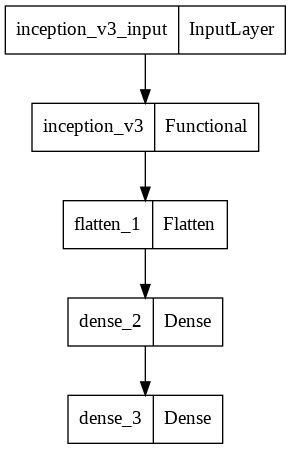

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_cnn)

VGG NET 16

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
model3=VGG16(input_shape=(75, 75, 3),weights="imagenet",include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
def build_cnn_model(input_shape = (75, 75, 3), num_classes=2):
  model = Sequential() # layer has 1 i/p and 1 o/p
  model.add(model1)
  model.add(Flatten())
  model.add(keras.layers.Dense(128,activation="relu"))
  model.add(keras.layers.Dense(8,activation="sigmoid"))
  model.summary()
  optimizer= Adam(lr=0.001)

  model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])

  return model

In [ ]:
model_cnn = build_cnn_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               262272    
                                                                 
 dense_5 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 22,066,088
Trainable params: 22,031,656
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                         factor=0.5,
                                          min_lr = 1e-4)

history = model_cnn.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(x_test,y_test))

Epoch 1/50
277/278 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9932

278/278 [==============================] - 15s 56ms/step - loss: 0.0055 - accuracy: 0.9931 - val_loss: 0.3806 - val_accuracy: 0.6946 - lr: 0.0010
Epoch 2/50
277/278 [============================>.] - ETA: 0s - loss: 0.0190 - accuracy: 0.9759

278/278 [==============================] - 16s 56ms/step - loss: 0.0190 - accuracy: 0.9759 - val_loss: 0.3292 - val_accuracy: 0.6959 - lr: 0.0010
Epoch 3/50
278/278 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 0.9938

278/278 [==============================] - 16s 56ms/step - loss: 0.0052 - accuracy: 0.9938 - val_loss: 0.3702 - val_accuracy: 0.6947 - lr: 0.0010
Epoch 4/50
278/278 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9870

278/278 [==============================] - 15s 56ms/step - loss: 0.0107 - accuracy: 0.9870 - val_loss: 0.3913 - val_accuracy: 0.6938 - lr: 0.0010
Epoch 5/50
277/278 [============================>.] - ETA: 0s - loss: 0.0074 - accuracy: 0.9911

278/278 [==============================] - 15s 53ms/step - loss: 0.0075 - accuracy: 0.9910 - val_loss: 0.3767 - val_accuracy: 0.6957 - lr: 0.0010
Epoch 6/50
278/278 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 0.9866

278/278 [==============================] - 15s 54ms/step - loss: 0.0105 - accuracy: 0.9866 - val_loss: 0.3537 - val_accuracy: 0.7074 - lr: 0.0010
Epoch 7/50
277/278 [============================>.] - ETA: 0s - loss: 0.0076 - accuracy: 0.9901

278/278 [==============================] - 15s 54ms/step - loss: 0.0076 - accuracy: 0.9900 - val_loss: 0.3542 - val_accuracy: 0.6951 - lr: 0.0010
Epoch 8/50
278/278 [==============================] - ETA: 0s - loss: 0.0103 - accuracy: 0.9859

278/278 [==============================] - 15s 54ms/step - loss: 0.0103 - accuracy: 0.9859 - val_loss: 0.3357 - val_accuracy: 0.6993 - lr: 0.0010
Epoch 9/50
278/278 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9935

278/278 [==============================] - 16s 57ms/step - loss: 0.0054 - accuracy: 0.9935 - val_loss: 0.3850 - val_accuracy: 0.7059 - lr: 0.0010
Epoch 10/50
277/278 [============================>.] - ETA: 0s - loss: 0.0069 - accuracy: 0.9913

278/278 [==============================] - 15s 56ms/step - loss: 0.0074 - accuracy: 0.9912 - val_loss: 0.3622 - val_accuracy: 0.6951 - lr: 0.0010
Epoch 11/50
278/278 [==============================] - ETA: 0s - loss: 0.0088 - accuracy: 0.9889

278/278 [==============================] - 15s 55ms/step - loss: 0.0088 - accuracy: 0.9889 - val_loss: 0.3919 - val_accuracy: 0.7061 - lr: 0.0010
Epoch 12/50
277/278 [============================>.] - ETA: 0s - loss: 0.0212 - accuracy: 0.9715

278/278 [==============================] - 16s 57ms/step - loss: 0.0212 - accuracy: 0.9714 - val_loss: 0.3592 - val_accuracy: 0.6966 - lr: 0.0010
Epoch 13/50
278/278 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9842

278/278 [==============================] - 15s 55ms/step - loss: 0.0126 - accuracy: 0.9842 - val_loss: 0.3486 - val_accuracy: 0.6838 - lr: 0.0010
Epoch 14/50
277/278 [============================>.] - ETA: 0s - loss: 0.0055 - accuracy: 0.9938

278/278 [==============================] - 16s 56ms/step - loss: 0.0055 - accuracy: 0.9937 - val_loss: 0.4021 - val_accuracy: 0.6930 - lr: 0.0010
Epoch 15/50
278/278 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 0.9915

278/278 [==============================] - 16s 56ms/step - loss: 0.0071 - accuracy: 0.9915 - val_loss: 0.3495 - val_accuracy: 0.7101 - lr: 0.0010
Epoch 16/50
277/278 [============================>.] - ETA: 0s - loss: 0.0103 - accuracy: 0.9872

278/278 [==============================] - 15s 55ms/step - loss: 0.0103 - accuracy: 0.9871 - val_loss: 0.3372 - val_accuracy: 0.6999 - lr: 0.0010
Epoch 17/50
278/278 [==============================] - ETA: 0s - loss: 0.0078 - accuracy: 0.9897

278/278 [==============================] - 15s 55ms/step - loss: 0.0078 - accuracy: 0.9897 - val_loss: 0.3898 - val_accuracy: 0.6984 - lr: 0.0010
Epoch 18/50
277/278 [============================>.] - ETA: 0s - loss: 0.0112 - accuracy: 0.9858

278/278 [==============================] - 15s 56ms/step - loss: 0.0112 - accuracy: 0.9858 - val_loss: 0.3740 - val_accuracy: 0.7075 - lr: 0.0010
Epoch 19/50
278/278 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9811

278/278 [==============================] - 16s 57ms/step - loss: 0.0140 - accuracy: 0.9811 - val_loss: 0.3374 - val_accuracy: 0.6909 - lr: 0.0010
Epoch 20/50
277/278 [============================>.] - ETA: 0s - loss: 0.0056 - accuracy: 0.9929

278/278 [==============================] - 16s 58ms/step - loss: 0.0058 - accuracy: 0.9928 - val_loss: 0.3470 - val_accuracy: 0.6853 - lr: 0.0010
Epoch 21/50
277/278 [============================>.] - ETA: 0s - loss: 0.0119 - accuracy: 0.9851

278/278 [==============================] - 16s 58ms/step - loss: 0.0119 - accuracy: 0.9850 - val_loss: 0.3291 - val_accuracy: 0.7089 - lr: 0.0010
Epoch 22/50
277/278 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9945

278/278 [==============================] - 16s 58ms/step - loss: 0.0048 - accuracy: 0.9944 - val_loss: 0.3682 - val_accuracy: 0.6916 - lr: 0.0010
Epoch 23/50
277/278 [============================>.] - ETA: 0s - loss: 0.0058 - accuracy: 0.9925

278/278 [==============================] - 16s 57ms/step - loss: 0.0059 - accuracy: 0.9924 - val_loss: 0.3849 - val_accuracy: 0.6759 - lr: 0.0010
Epoch 24/50
277/278 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.9919

278/278 [==============================] - 16s 57ms/step - loss: 0.0057 - accuracy: 0.9919 - val_loss: 0.4261 - val_accuracy: 0.6938 - lr: 0.0010
Epoch 25/50
277/278 [============================>.] - ETA: 0s - loss: 0.0067 - accuracy: 0.9909

278/278 [==============================] - 16s 57ms/step - loss: 0.0069 - accuracy: 0.9908 - val_loss: 0.4074 - val_accuracy: 0.6947 - lr: 0.0010
Epoch 26/50
278/278 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9918

278/278 [==============================] - 16s 57ms/step - loss: 0.0068 - accuracy: 0.9918 - val_loss: 0.3545 - val_accuracy: 0.7050 - lr: 0.0010
Epoch 27/50
277/278 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9929

278/278 [==============================] - 16s 57ms/step - loss: 0.0064 - accuracy: 0.9930 - val_loss: 0.3763 - val_accuracy: 0.6880 - lr: 0.0010
Epoch 28/50
277/278 [============================>.] - ETA: 0s - loss: 0.0076 - accuracy: 0.9905

278/278 [==============================] - 16s 58ms/step - loss: 0.0078 - accuracy: 0.9904 - val_loss: 0.3506 - val_accuracy: 0.7054 - lr: 0.0010
Epoch 29/50
277/278 [============================>.] - ETA: 0s - loss: 0.0075 - accuracy: 0.9901

278/278 [==============================] - 16s 57ms/step - loss: 0.0076 - accuracy: 0.9901 - val_loss: 0.4339 - val_accuracy: 0.6878 - lr: 0.0010
Epoch 30/50
278/278 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9913

278/278 [==============================] - 15s 53ms/step - loss: 0.0064 - accuracy: 0.9913 - val_loss: 0.4014 - val_accuracy: 0.6862 - lr: 0.0010
Epoch 31/50
278/278 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9930

278/278 [==============================] - 15s 54ms/step - loss: 0.0055 - accuracy: 0.9930 - val_loss: 0.3816 - val_accuracy: 0.7072 - lr: 0.0010
Epoch 32/50
277/278 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.9917

278/278 [==============================] - 15s 55ms/step - loss: 0.0063 - accuracy: 0.9917 - val_loss: 0.3822 - val_accuracy: 0.6816 - lr: 0.0010
Epoch 33/50
278/278 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9918

278/278 [==============================] - 15s 54ms/step - loss: 0.0064 - accuracy: 0.9918 - val_loss: 0.3513 - val_accuracy: 0.7054 - lr: 0.0010
Epoch 34/50
278/278 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9939

278/278 [==============================] - 15s 55ms/step - loss: 0.0051 - accuracy: 0.9939 - val_loss: 0.3605 - val_accuracy: 0.7009 - lr: 0.0010
Epoch 35/50
277/278 [============================>.] - ETA: 0s - loss: 0.0055 - accuracy: 0.9930

278/278 [==============================] - 15s 55ms/step - loss: 0.0055 - accuracy: 0.9930 - val_loss: 0.4395 - val_accuracy: 0.6699 - lr: 0.0010
Epoch 36/50
277/278 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.9916

278/278 [==============================] - 15s 54ms/step - loss: 0.0064 - accuracy: 0.9915 - val_loss: 0.3963 - val_accuracy: 0.7072 - lr: 0.0010
Epoch 37/50
277/278 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9911

278/278 [==============================] - 15s 54ms/step - loss: 0.0063 - accuracy: 0.9910 - val_loss: 0.3972 - val_accuracy: 0.6997 - lr: 0.0010
Epoch 38/50
278/278 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9834

278/278 [==============================] - 15s 54ms/step - loss: 0.0134 - accuracy: 0.9834 - val_loss: 0.3764 - val_accuracy: 0.7014 - lr: 0.0010
Epoch 39/50
277/278 [============================>.] - ETA: 0s - loss: 0.0083 - accuracy: 0.9891

278/278 [==============================] - 15s 53ms/step - loss: 0.0083 - accuracy: 0.9891 - val_loss: 0.3824 - val_accuracy: 0.7182 - lr: 0.0010
Epoch 40/50
278/278 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.9954

278/278 [==============================] - 15s 55ms/step - loss: 0.0036 - accuracy: 0.9954 - val_loss: 0.3751 - val_accuracy: 0.7145 - lr: 0.0010
Epoch 41/50
277/278 [============================>.] - ETA: 0s - loss: 0.0050 - accuracy: 0.9929

278/278 [==============================] - 15s 55ms/step - loss: 0.0053 - accuracy: 0.9927 - val_loss: 0.4407 - val_accuracy: 0.6880 - lr: 0.0010
Epoch 42/50
278/278 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9915

278/278 [==============================] - 15s 54ms/step - loss: 0.0064 - accuracy: 0.9915 - val_loss: 0.3705 - val_accuracy: 0.7086 - lr: 0.0010
Epoch 43/50
277/278 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9932

278/278 [==============================] - 15s 55ms/step - loss: 0.0060 - accuracy: 0.9932 - val_loss: 0.4104 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 44/50
278/278 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9950

278/278 [==============================] - 15s 55ms/step - loss: 0.0039 - accuracy: 0.9950 - val_loss: 0.4270 - val_accuracy: 0.6929 - lr: 0.0010
Epoch 45/50
278/278 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9950

278/278 [==============================] - 15s 54ms/step - loss: 0.0042 - accuracy: 0.9950 - val_loss: 0.4356 - val_accuracy: 0.6982 - lr: 0.0010
Epoch 46/50
278/278 [==============================] - ETA: 0s - loss: 0.0793 - accuracy: 0.8826

278/278 [==============================] - 15s 55ms/step - loss: 0.0793 - accuracy: 0.8826 - val_loss: 0.2570 - val_accuracy: 0.6770 - lr: 0.0010
Epoch 47/50
277/278 [============================>.] - ETA: 0s - loss: 0.0166 - accuracy: 0.9775

278/278 [==============================] - 15s 55ms/step - loss: 0.0167 - accuracy: 0.9775 - val_loss: 0.3143 - val_accuracy: 0.7029 - lr: 0.0010
Epoch 48/50
278/278 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9930

278/278 [==============================] - 15s 55ms/step - loss: 0.0056 - accuracy: 0.9930 - val_loss: 0.3881 - val_accuracy: 0.7087 - lr: 0.0010
Epoch 49/50
277/278 [============================>.] - ETA: 0s - loss: 0.0052 - accuracy: 0.9937

278/278 [==============================] - 15s 55ms/step - loss: 0.0052 - accuracy: 0.9937 - val_loss: 0.4024 - val_accuracy: 0.7108 - lr: 0.0010
Epoch 50/50
278/278 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9963

278/278 [==============================] - 15s 55ms/step - loss: 0.0030 - accuracy: 0.9963 - val_loss: 0.4240 - val_accuracy: 0.7118 - lr: 0.0010


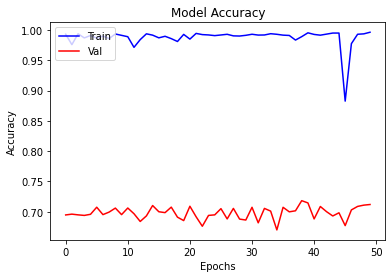

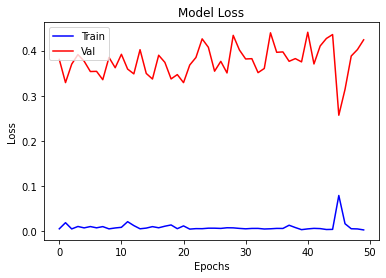

In [ ]:
plt.plot(history.history['accuracy'],color='blue')
plt.plot(history.history['val_accuracy'],color='red')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='red')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
model_cnn.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               262272    
                                                                 
 dense_5 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 22,066,088
Trainable params: 22,031,656
Non-trainable params: 34,432
_________________________________________________________________


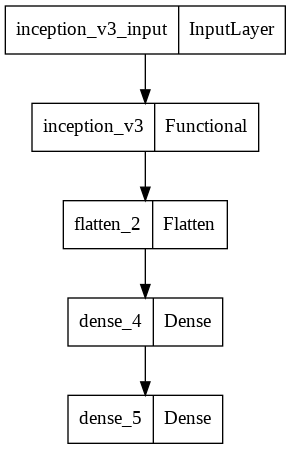

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_cnn)

RESNET

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
model2=ResNet50(input_shape=(75, 75, 3),weights="imagenet",include_top=False)

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
def build_cnn_model(input_shape = (75, 75, 3), num_classes=2):
  model = Sequential() # layer has 1 i/p and 1 o/p
  model.add(model2)
  model.add(Flatten())
  model.add(keras.layers.Dense(128,activation="relu"))
  model.add(keras.layers.Dense(8,activation="sigmoid"))
  model.summary()
  optimizer= Adam(lr=0.001)

  model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])

  return model

In [ ]:
model_cnn = build_cnn_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               2359424   
                                                                 
 dense_7 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 25,948,168
Trainable params: 25,895,048
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                         factor=0.5,
                                          min_lr = 1e-4)

history = model_cnn.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(x_test,y_test))

Epoch 1/50
278/278 [==============================] - ETA: 0s - loss: 0.2352 - accuracy: 0.6245

278/278 [==============================] - 20s 48ms/step - loss: 0.2352 - accuracy: 0.6245 - val_loss: 0.3995 - val_accuracy: 0.5089 - lr: 0.0010
Epoch 2/50
277/278 [============================>.] - ETA: 0s - loss: 0.2111 - accuracy: 0.6323

278/278 [==============================] - 11s 41ms/step - loss: 0.2111 - accuracy: 0.6323 - val_loss: 0.3182 - val_accuracy: 0.5084 - lr: 0.0010
Epoch 3/50
277/278 [============================>.] - ETA: 0s - loss: 0.1908 - accuracy: 0.6640

278/278 [==============================] - 11s 40ms/step - loss: 0.1908 - accuracy: 0.6640 - val_loss: 0.2617 - val_accuracy: 0.5388 - lr: 0.0010
Epoch 4/50
277/278 [============================>.] - ETA: 0s - loss: 0.1764 - accuracy: 0.6934

278/278 [==============================] - 11s 40ms/step - loss: 0.1764 - accuracy: 0.6934 - val_loss: 0.2240 - val_accuracy: 0.5909 - lr: 0.0010
Epoch 5/50
277/278 [============================>.] - ETA: 0s - loss: 0.1608 - accuracy: 0.7231

278/278 [==============================] - 11s 41ms/step - loss: 0.1608 - accuracy: 0.7231 - val_loss: 0.2018 - val_accuracy: 0.6620 - lr: 0.0010
Epoch 6/50
277/278 [============================>.] - ETA: 0s - loss: 0.1490 - accuracy: 0.7475

278/278 [==============================] - 11s 41ms/step - loss: 0.1491 - accuracy: 0.7474 - val_loss: 0.5172 - val_accuracy: 0.6162 - lr: 0.0010
Epoch 7/50
277/278 [============================>.] - ETA: 0s - loss: 0.1422 - accuracy: 0.7612

278/278 [==============================] - 11s 41ms/step - loss: 0.1422 - accuracy: 0.7612 - val_loss: 0.2554 - val_accuracy: 0.6239 - lr: 0.0010
Epoch 8/50
277/278 [============================>.] - ETA: 0s - loss: 0.1225 - accuracy: 0.7981

278/278 [==============================] - 11s 40ms/step - loss: 0.1225 - accuracy: 0.7982 - val_loss: 0.4162 - val_accuracy: 0.5705 - lr: 0.0010
Epoch 9/50
277/278 [============================>.] - ETA: 0s - loss: 0.1131 - accuracy: 0.8162

278/278 [==============================] - 11s 41ms/step - loss: 0.1131 - accuracy: 0.8162 - val_loss: 2.3394 - val_accuracy: 0.5757 - lr: 0.0010
Epoch 10/50
277/278 [============================>.] - ETA: 0s - loss: 0.1191 - accuracy: 0.8188

278/278 [==============================] - 11s 41ms/step - loss: 0.1191 - accuracy: 0.8187 - val_loss: 0.2104 - val_accuracy: 0.6758 - lr: 0.0010
Epoch 11/50
277/278 [============================>.] - ETA: 0s - loss: 0.0914 - accuracy: 0.8581

278/278 [==============================] - 11s 41ms/step - loss: 0.0914 - accuracy: 0.8580 - val_loss: 0.2524 - val_accuracy: 0.6476 - lr: 0.0010
Epoch 12/50
277/278 [============================>.] - ETA: 0s - loss: 0.0712 - accuracy: 0.8901

278/278 [==============================] - 11s 40ms/step - loss: 0.0713 - accuracy: 0.8900 - val_loss: 1.5604 - val_accuracy: 0.5825 - lr: 0.0010
Epoch 13/50
277/278 [============================>.] - ETA: 0s - loss: 0.0811 - accuracy: 0.8815

278/278 [==============================] - 11s 41ms/step - loss: 0.0811 - accuracy: 0.8815 - val_loss: 0.2927 - val_accuracy: 0.6309 - lr: 0.0010
Epoch 14/50
277/278 [============================>.] - ETA: 0s - loss: 0.0456 - accuracy: 0.9342

278/278 [==============================] - 11s 41ms/step - loss: 0.0456 - accuracy: 0.9342 - val_loss: 0.3150 - val_accuracy: 0.6134 - lr: 0.0010
Epoch 15/50
277/278 [============================>.] - ETA: 0s - loss: 0.0414 - accuracy: 0.9390

278/278 [==============================] - 11s 41ms/step - loss: 0.0414 - accuracy: 0.9389 - val_loss: 0.4408 - val_accuracy: 0.6121 - lr: 0.0010
Epoch 16/50
277/278 [============================>.] - ETA: 0s - loss: 0.0575 - accuracy: 0.9161

278/278 [==============================] - 11s 40ms/step - loss: 0.0575 - accuracy: 0.9161 - val_loss: 0.2902 - val_accuracy: 0.6708 - lr: 0.0010
Epoch 17/50
277/278 [============================>.] - ETA: 0s - loss: 0.0281 - accuracy: 0.9601

278/278 [==============================] - 11s 41ms/step - loss: 0.0282 - accuracy: 0.9601 - val_loss: 0.4548 - val_accuracy: 0.6247 - lr: 0.0010
Epoch 18/50
277/278 [============================>.] - ETA: 0s - loss: 0.0742 - accuracy: 0.8862

278/278 [==============================] - 11s 41ms/step - loss: 0.0742 - accuracy: 0.8861 - val_loss: 0.4398 - val_accuracy: 0.6170 - lr: 0.0010
Epoch 19/50
277/278 [============================>.] - ETA: 0s - loss: 0.0260 - accuracy: 0.9638

278/278 [==============================] - 11s 41ms/step - loss: 0.0260 - accuracy: 0.9638 - val_loss: 0.3656 - val_accuracy: 0.6503 - lr: 0.0010
Epoch 20/50
277/278 [============================>.] - ETA: 0s - loss: 0.0231 - accuracy: 0.9684

278/278 [==============================] - 11s 41ms/step - loss: 0.0231 - accuracy: 0.9684 - val_loss: 0.3966 - val_accuracy: 0.6428 - lr: 0.0010
Epoch 21/50
277/278 [============================>.] - ETA: 0s - loss: 0.0193 - accuracy: 0.9722

278/278 [==============================] - 12s 42ms/step - loss: 0.0194 - accuracy: 0.9722 - val_loss: 0.3910 - val_accuracy: 0.6445 - lr: 0.0010
Epoch 22/50
277/278 [============================>.] - ETA: 0s - loss: 0.0295 - accuracy: 0.9595

278/278 [==============================] - 12s 42ms/step - loss: 0.0295 - accuracy: 0.9594 - val_loss: 0.3568 - val_accuracy: 0.6209 - lr: 0.0010
Epoch 23/50
277/278 [============================>.] - ETA: 0s - loss: 0.0236 - accuracy: 0.9657

278/278 [==============================] - 12s 42ms/step - loss: 0.0237 - accuracy: 0.9657 - val_loss: 0.9680 - val_accuracy: 0.5487 - lr: 0.0010
Epoch 24/50
277/278 [============================>.] - ETA: 0s - loss: 0.0319 - accuracy: 0.9554

278/278 [==============================] - 12s 42ms/step - loss: 0.0319 - accuracy: 0.9554 - val_loss: 0.4177 - val_accuracy: 0.6239 - lr: 0.0010
Epoch 25/50
277/278 [============================>.] - ETA: 0s - loss: 0.0270 - accuracy: 0.9683

278/278 [==============================] - 12s 42ms/step - loss: 0.0270 - accuracy: 0.9682 - val_loss: 0.3663 - val_accuracy: 0.5479 - lr: 0.0010
Epoch 26/50
277/278 [============================>.] - ETA: 0s - loss: 0.0398 - accuracy: 0.9474

278/278 [==============================] - 12s 43ms/step - loss: 0.0399 - accuracy: 0.9473 - val_loss: 0.3788 - val_accuracy: 0.6618 - lr: 0.0010
Epoch 27/50
277/278 [============================>.] - ETA: 0s - loss: 0.0376 - accuracy: 0.9490

278/278 [==============================] - 12s 42ms/step - loss: 0.0377 - accuracy: 0.9490 - val_loss: 0.3367 - val_accuracy: 0.5657 - lr: 0.0010
Epoch 28/50
277/278 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9763

278/278 [==============================] - 12s 42ms/step - loss: 0.0189 - accuracy: 0.9762 - val_loss: 0.3832 - val_accuracy: 0.6375 - lr: 0.0010
Epoch 29/50
277/278 [============================>.] - ETA: 0s - loss: 0.0206 - accuracy: 0.9730

278/278 [==============================] - 12s 42ms/step - loss: 0.0206 - accuracy: 0.9730 - val_loss: 0.3657 - val_accuracy: 0.6412 - lr: 0.0010
Epoch 30/50
277/278 [============================>.] - ETA: 0s - loss: 0.0353 - accuracy: 0.9525

278/278 [==============================] - 12s 42ms/step - loss: 0.0355 - accuracy: 0.9525 - val_loss: 0.5617 - val_accuracy: 0.6321 - lr: 0.0010
Epoch 31/50
277/278 [============================>.] - ETA: 0s - loss: 0.0557 - accuracy: 0.9200

278/278 [==============================] - 12s 42ms/step - loss: 0.0557 - accuracy: 0.9200 - val_loss: 0.3155 - val_accuracy: 0.6566 - lr: 0.0010
Epoch 32/50
277/278 [============================>.] - ETA: 0s - loss: 0.0107 - accuracy: 0.9871

278/278 [==============================] - 12s 42ms/step - loss: 0.0107 - accuracy: 0.9871 - val_loss: 0.4604 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 33/50
277/278 [============================>.] - ETA: 0s - loss: 0.0112 - accuracy: 0.9854

278/278 [==============================] - 12s 42ms/step - loss: 0.0112 - accuracy: 0.9854 - val_loss: 0.4234 - val_accuracy: 0.6671 - lr: 0.0010
Epoch 34/50
277/278 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.9922

278/278 [==============================] - 12s 42ms/step - loss: 0.0063 - accuracy: 0.9921 - val_loss: 0.4693 - val_accuracy: 0.6596 - lr: 0.0010
Epoch 35/50
277/278 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.9845

278/278 [==============================] - 12s 42ms/step - loss: 0.0129 - accuracy: 0.9845 - val_loss: 0.4905 - val_accuracy: 0.6507 - lr: 0.0010
Epoch 36/50
277/278 [============================>.] - ETA: 0s - loss: 0.0101 - accuracy: 0.9883

278/278 [==============================] - 12s 42ms/step - loss: 0.0102 - accuracy: 0.9883 - val_loss: 0.4894 - val_accuracy: 0.6371 - lr: 0.0010
Epoch 37/50
277/278 [============================>.] - ETA: 0s - loss: 0.0088 - accuracy: 0.9892

278/278 [==============================] - 12s 42ms/step - loss: 0.0088 - accuracy: 0.9892 - val_loss: 0.4467 - val_accuracy: 0.6459 - lr: 0.0010
Epoch 38/50
277/278 [============================>.] - ETA: 0s - loss: 0.0074 - accuracy: 0.9897

278/278 [==============================] - 12s 42ms/step - loss: 0.0074 - accuracy: 0.9896 - val_loss: 0.4845 - val_accuracy: 0.6521 - lr: 0.0010
Epoch 39/50
277/278 [============================>.] - ETA: 0s - loss: 0.0229 - accuracy: 0.9677

278/278 [==============================] - 12s 42ms/step - loss: 0.0229 - accuracy: 0.9677 - val_loss: 0.4338 - val_accuracy: 0.6422 - lr: 0.0010
Epoch 40/50
277/278 [============================>.] - ETA: 0s - loss: 0.0084 - accuracy: 0.9895

278/278 [==============================] - 12s 42ms/step - loss: 0.0085 - accuracy: 0.9895 - val_loss: 0.4314 - val_accuracy: 0.6520 - lr: 0.0010
Epoch 41/50
277/278 [============================>.] - ETA: 0s - loss: 0.0144 - accuracy: 0.9821

278/278 [==============================] - 11s 40ms/step - loss: 0.0147 - accuracy: 0.9821 - val_loss: 0.3895 - val_accuracy: 0.6505 - lr: 0.0010
Epoch 42/50
277/278 [============================>.] - ETA: 0s - loss: 0.0298 - accuracy: 0.9659

278/278 [==============================] - 11s 41ms/step - loss: 0.0298 - accuracy: 0.9659 - val_loss: 0.3641 - val_accuracy: 0.6603 - lr: 0.0010
Epoch 43/50
277/278 [============================>.] - ETA: 0s - loss: 0.0051 - accuracy: 0.9931

278/278 [==============================] - 11s 41ms/step - loss: 0.0051 - accuracy: 0.9931 - val_loss: 0.4636 - val_accuracy: 0.6713 - lr: 0.0010
Epoch 44/50
277/278 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9836

278/278 [==============================] - 11s 41ms/step - loss: 0.0124 - accuracy: 0.9836 - val_loss: 0.4187 - val_accuracy: 0.6292 - lr: 0.0010
Epoch 45/50
277/278 [============================>.] - ETA: 0s - loss: 0.0161 - accuracy: 0.9779

278/278 [==============================] - 11s 40ms/step - loss: 0.0161 - accuracy: 0.9778 - val_loss: 0.3910 - val_accuracy: 0.6353 - lr: 0.0010
Epoch 46/50
277/278 [============================>.] - ETA: 0s - loss: 0.0164 - accuracy: 0.9782

278/278 [==============================] - 11s 41ms/step - loss: 0.0164 - accuracy: 0.9782 - val_loss: 0.4272 - val_accuracy: 0.6639 - lr: 0.0010
Epoch 47/50
277/278 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9915

278/278 [==============================] - 11s 41ms/step - loss: 0.0068 - accuracy: 0.9914 - val_loss: 0.4777 - val_accuracy: 0.6203 - lr: 0.0010
Epoch 48/50
277/278 [============================>.] - ETA: 0s - loss: 0.0206 - accuracy: 0.9725

278/278 [==============================] - 11s 41ms/step - loss: 0.0206 - accuracy: 0.9725 - val_loss: 0.3957 - val_accuracy: 0.6345 - lr: 0.0010
Epoch 49/50
277/278 [============================>.] - ETA: 0s - loss: 0.0053 - accuracy: 0.9933

278/278 [==============================] - 11s 40ms/step - loss: 0.0053 - accuracy: 0.9933 - val_loss: 0.4197 - val_accuracy: 0.6693 - lr: 0.0010
Epoch 50/50
277/278 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.9930

278/278 [==============================] - 11s 41ms/step - loss: 0.0058 - accuracy: 0.9930 - val_loss: 0.5107 - val_accuracy: 0.6234 - lr: 0.0010


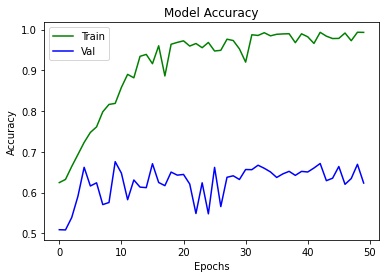

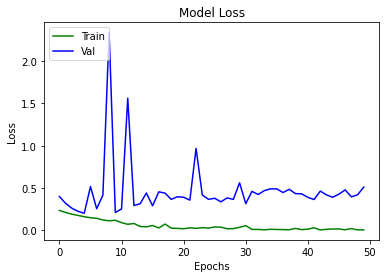

In [ ]:
plt.plot(history.history['accuracy'],color='green')
plt.plot(history.history['val_accuracy'],color='blue')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'],color='green')
plt.plot(history.history['val_loss'],color='blue')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
model_cnn.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               2359424   
                                                                 
 dense_7 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 25,948,168
Trainable params: 25,895,048
Non-trainable params: 53,120
_________________________________________________________________


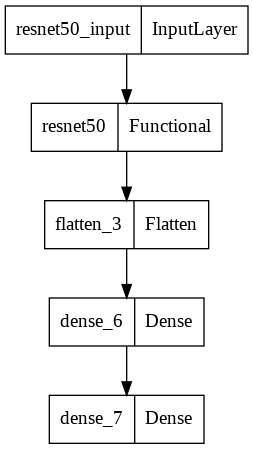

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_cnn)

EFFICIENT NET - B5

In [ ]:
!pip install keras_efficientnets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 4.8 MB/s 


In [ ]:
import keras_applications
from keras_efficientnets import EfficientNetB5
base_model = EfficientNetB5(include_top=False, weights="imagenet", input_shape=(75,75,3),classes=y_train.shape[1])

115295288/115295288 [==============================] - 10s 0us/step


In [ ]:
def build_cnn_model(input_shape = (75, 75, 3), num_classes=2):
    model = Sequential()
    model.add(base_model)
    #model.add(Conv2D(64, kernel_size=(3,3), padding='Same', input_shape = input_shape, activation='relu', kernel_initializer = 'glorot_uniform'))
    #model.add(MaxPool2D(pool_size = (2,2)))
    #model.add(Dropout(0.25))


    #model.add(Conv2D(64, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'))
    #model.add(MaxPool2D(pool_size=(2,2)))
    #model.add(Dropout(0.25))


    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))

    model.add(Dense(8, activation = 'softmax'))
    model.summary()
    optimizer= Adam(lr=0.001)

    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])

    return model

In [ ]:
model_cnn = build_cnn_model()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 3, 3, 2048)        28513520  
                                                                 
 flatten_4 (Flatten)         (None, 18432)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               2359424   
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 30,890,488
Trainable params: 30,717,752
Non-trainable params: 172,736
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                         factor=0.5,
                                          min_lr = 1e-4)

history = model_cnn.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(x_test,y_test))

Epoch 1/50
278/278 [==============================] - ETA: 0s - loss: 0.2082 - accuracy: 0.6444

278/278 [==============================] - 69s 171ms/step - loss: 0.2082 - accuracy: 0.6444 - val_loss: 0.2100 - val_accuracy: 0.6450 - lr: 0.0010
Epoch 2/50
278/278 [==============================] - ETA: 0s - loss: 0.1719 - accuracy: 0.7092

278/278 [==============================] - 43s 155ms/step - loss: 0.1719 - accuracy: 0.7092 - val_loss: 0.1757 - val_accuracy: 0.7111 - lr: 0.0010
Epoch 3/50
278/278 [==============================] - ETA: 0s - loss: 0.1441 - accuracy: 0.7650

278/278 [==============================] - 43s 153ms/step - loss: 0.1441 - accuracy: 0.7650 - val_loss: 0.1857 - val_accuracy: 0.7032 - lr: 0.0010
Epoch 4/50
278/278 [==============================] - ETA: 0s - loss: 0.1230 - accuracy: 0.8054

278/278 [==============================] - 43s 154ms/step - loss: 0.1230 - accuracy: 0.8054 - val_loss: 0.1719 - val_accuracy: 0.7226 - lr: 0.0010
Epoch 5/50
278/278 [==============================] - ETA: 0s - loss: 0.1108 - accuracy: 0.8298

278/278 [==============================] - 43s 154ms/step - loss: 0.1108 - accuracy: 0.8298 - val_loss: 0.1946 - val_accuracy: 0.7071 - lr: 0.0010
Epoch 6/50
278/278 [==============================] - ETA: 0s - loss: 0.0967 - accuracy: 0.8513

278/278 [==============================] - 43s 155ms/step - loss: 0.0967 - accuracy: 0.8513 - val_loss: 0.2035 - val_accuracy: 0.7258 - lr: 0.0010
Epoch 7/50
278/278 [==============================] - ETA: 0s - loss: 0.0892 - accuracy: 0.8635

278/278 [==============================] - 43s 154ms/step - loss: 0.0892 - accuracy: 0.8635 - val_loss: 0.1952 - val_accuracy: 0.7401 - lr: 0.0010
Epoch 8/50
278/278 [==============================] - ETA: 0s - loss: 0.0614 - accuracy: 0.9086

278/278 [==============================] - 43s 156ms/step - loss: 0.0614 - accuracy: 0.9086 - val_loss: 0.2146 - val_accuracy: 0.7347 - lr: 0.0010
Epoch 9/50
278/278 [==============================] - ETA: 0s - loss: 0.0515 - accuracy: 0.9260

278/278 [==============================] - 43s 154ms/step - loss: 0.0515 - accuracy: 0.9260 - val_loss: 0.2260 - val_accuracy: 0.7213 - lr: 0.0010
Epoch 10/50
278/278 [==============================] - ETA: 0s - loss: 0.0408 - accuracy: 0.9432

278/278 [==============================] - 44s 157ms/step - loss: 0.0408 - accuracy: 0.9432 - val_loss: 0.2649 - val_accuracy: 0.6957 - lr: 0.0010
Epoch 11/50
278/278 [==============================] - ETA: 0s - loss: 0.0585 - accuracy: 0.9148

278/278 [==============================] - 43s 156ms/step - loss: 0.0585 - accuracy: 0.9148 - val_loss: 0.2292 - val_accuracy: 0.7303 - lr: 0.0010
Epoch 12/50
278/278 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9358

278/278 [==============================] - 44s 157ms/step - loss: 0.0447 - accuracy: 0.9358 - val_loss: 0.2396 - val_accuracy: 0.7379 - lr: 0.0010
Epoch 13/50
278/278 [==============================] - ETA: 0s - loss: 0.0304 - accuracy: 0.9586

278/278 [==============================] - 44s 158ms/step - loss: 0.0304 - accuracy: 0.9586 - val_loss: 0.2814 - val_accuracy: 0.7458 - lr: 0.0010
Epoch 14/50
278/278 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 0.9677

278/278 [==============================] - 43s 156ms/step - loss: 0.0234 - accuracy: 0.9677 - val_loss: 0.2453 - val_accuracy: 0.7183 - lr: 0.0010
Epoch 15/50
278/278 [==============================] - ETA: 0s - loss: 0.0974 - accuracy: 0.8533

278/278 [==============================] - 43s 156ms/step - loss: 0.0974 - accuracy: 0.8533 - val_loss: 0.2130 - val_accuracy: 0.7354 - lr: 0.0010
Epoch 16/50
278/278 [==============================] - ETA: 0s - loss: 0.0287 - accuracy: 0.9598

278/278 [==============================] - 43s 155ms/step - loss: 0.0287 - accuracy: 0.9598 - val_loss: 0.2441 - val_accuracy: 0.7493 - lr: 0.0010
Epoch 17/50
278/278 [==============================] - ETA: 0s - loss: 0.0226 - accuracy: 0.9693

278/278 [==============================] - 43s 154ms/step - loss: 0.0226 - accuracy: 0.9693 - val_loss: 0.2546 - val_accuracy: 0.7438 - lr: 0.0010
Epoch 18/50
278/278 [==============================] - ETA: 0s - loss: 0.0199 - accuracy: 0.9733

278/278 [==============================] - 43s 154ms/step - loss: 0.0199 - accuracy: 0.9733 - val_loss: 0.2720 - val_accuracy: 0.7417 - lr: 0.0010
Epoch 19/50
278/278 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 0.9750

278/278 [==============================] - 43s 155ms/step - loss: 0.0188 - accuracy: 0.9750 - val_loss: 0.2998 - val_accuracy: 0.7497 - lr: 0.0010
Epoch 20/50
278/278 [==============================] - ETA: 0s - loss: 0.0243 - accuracy: 0.9672

278/278 [==============================] - 43s 154ms/step - loss: 0.0243 - accuracy: 0.9672 - val_loss: 0.2628 - val_accuracy: 0.7380 - lr: 0.0010
Epoch 21/50
278/278 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9642

278/278 [==============================] - 43s 155ms/step - loss: 0.0262 - accuracy: 0.9642 - val_loss: 0.2659 - val_accuracy: 0.7584 - lr: 0.0010
Epoch 22/50
278/278 [==============================] - ETA: 0s - loss: 0.0146 - accuracy: 0.9803

278/278 [==============================] - 43s 155ms/step - loss: 0.0146 - accuracy: 0.9803 - val_loss: 0.2974 - val_accuracy: 0.7478 - lr: 0.0010
Epoch 23/50
278/278 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9751

278/278 [==============================] - 43s 154ms/step - loss: 0.0176 - accuracy: 0.9751 - val_loss: 0.2991 - val_accuracy: 0.7537 - lr: 0.0010
Epoch 24/50
278/278 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9808

278/278 [==============================] - 43s 154ms/step - loss: 0.0143 - accuracy: 0.9808 - val_loss: 0.2778 - val_accuracy: 0.7484 - lr: 0.0010
Epoch 25/50
278/278 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9775

278/278 [==============================] - 43s 155ms/step - loss: 0.0164 - accuracy: 0.9775 - val_loss: 0.3143 - val_accuracy: 0.7566 - lr: 0.0010
Epoch 26/50
278/278 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 0.9834

278/278 [==============================] - 43s 156ms/step - loss: 0.0128 - accuracy: 0.9834 - val_loss: 0.3309 - val_accuracy: 0.7437 - lr: 0.0010
Epoch 27/50
278/278 [==============================] - ETA: 0s - loss: 0.0198 - accuracy: 0.9747

278/278 [==============================] - 43s 155ms/step - loss: 0.0198 - accuracy: 0.9747 - val_loss: 0.2781 - val_accuracy: 0.7487 - lr: 0.0010
Epoch 28/50
278/278 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9809

278/278 [==============================] - 43s 155ms/step - loss: 0.0154 - accuracy: 0.9809 - val_loss: 0.2479 - val_accuracy: 0.7514 - lr: 0.0010
Epoch 29/50
278/278 [==============================] - ETA: 0s - loss: 0.0395 - accuracy: 0.9459

278/278 [==============================] - 43s 156ms/step - loss: 0.0395 - accuracy: 0.9459 - val_loss: 0.2533 - val_accuracy: 0.7526 - lr: 0.0010
Epoch 30/50
278/278 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9800

278/278 [==============================] - 44s 157ms/step - loss: 0.0160 - accuracy: 0.9800 - val_loss: 0.2738 - val_accuracy: 0.7518 - lr: 0.0010
Epoch 31/50
278/278 [==============================] - ETA: 0s - loss: 0.0292 - accuracy: 0.9593

278/278 [==============================] - 44s 157ms/step - loss: 0.0292 - accuracy: 0.9593 - val_loss: 0.2693 - val_accuracy: 0.7537 - lr: 0.0010
Epoch 32/50
278/278 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.9859

278/278 [==============================] - 43s 156ms/step - loss: 0.0117 - accuracy: 0.9859 - val_loss: 0.2485 - val_accuracy: 0.7566 - lr: 0.0010
Epoch 33/50
278/278 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.9889

278/278 [==============================] - 44s 158ms/step - loss: 0.0087 - accuracy: 0.9889 - val_loss: 0.2809 - val_accuracy: 0.7492 - lr: 0.0010
Epoch 34/50
278/278 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 0.9650

278/278 [==============================] - 43s 156ms/step - loss: 0.0255 - accuracy: 0.9650 - val_loss: 0.3079 - val_accuracy: 0.7382 - lr: 0.0010
Epoch 35/50
278/278 [==============================] - ETA: 0s - loss: 0.0114 - accuracy: 0.9848

278/278 [==============================] - 43s 155ms/step - loss: 0.0114 - accuracy: 0.9848 - val_loss: 0.2953 - val_accuracy: 0.7266 - lr: 0.0010
Epoch 36/50
278/278 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 0.9871

278/278 [==============================] - 43s 154ms/step - loss: 0.0098 - accuracy: 0.9871 - val_loss: 0.3025 - val_accuracy: 0.7546 - lr: 0.0010
Epoch 37/50
278/278 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9879

278/278 [==============================] - 43s 155ms/step - loss: 0.0093 - accuracy: 0.9879 - val_loss: 0.3355 - val_accuracy: 0.7246 - lr: 0.0010
Epoch 38/50
278/278 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9701

278/278 [==============================] - 43s 154ms/step - loss: 0.0222 - accuracy: 0.9701 - val_loss: 0.2747 - val_accuracy: 0.7457 - lr: 0.0010
Epoch 39/50
278/278 [==============================] - ETA: 0s - loss: 0.0405 - accuracy: 0.9433

278/278 [==============================] - 43s 155ms/step - loss: 0.0405 - accuracy: 0.9433 - val_loss: 0.2750 - val_accuracy: 0.7421 - lr: 0.0010
Epoch 40/50
278/278 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.9857

278/278 [==============================] - 43s 154ms/step - loss: 0.0117 - accuracy: 0.9857 - val_loss: 0.2759 - val_accuracy: 0.7492 - lr: 0.0010
Epoch 41/50
278/278 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9816

278/278 [==============================] - 43s 154ms/step - loss: 0.0152 - accuracy: 0.9816 - val_loss: 0.2743 - val_accuracy: 0.7345 - lr: 0.0010
Epoch 42/50
278/278 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.9892

278/278 [==============================] - 43s 155ms/step - loss: 0.0079 - accuracy: 0.9892 - val_loss: 0.3116 - val_accuracy: 0.7388 - lr: 0.0010
Epoch 43/50
278/278 [==============================] - ETA: 0s - loss: 0.0151 - accuracy: 0.9805

278/278 [==============================] - 43s 154ms/step - loss: 0.0151 - accuracy: 0.9805 - val_loss: 0.2987 - val_accuracy: 0.7425 - lr: 0.0010
Epoch 44/50
278/278 [==============================] - ETA: 0s - loss: 0.0084 - accuracy: 0.9899

278/278 [==============================] - 43s 155ms/step - loss: 0.0084 - accuracy: 0.9899 - val_loss: 0.2780 - val_accuracy: 0.7516 - lr: 0.0010
Epoch 45/50
278/278 [==============================] - ETA: 0s - loss: 0.0091 - accuracy: 0.9892

278/278 [==============================] - 43s 156ms/step - loss: 0.0091 - accuracy: 0.9892 - val_loss: 0.2666 - val_accuracy: 0.7466 - lr: 0.0010
Epoch 46/50
278/278 [==============================] - ETA: 0s - loss: 0.0096 - accuracy: 0.9880

278/278 [==============================] - 43s 156ms/step - loss: 0.0096 - accuracy: 0.9880 - val_loss: 0.2946 - val_accuracy: 0.7503 - lr: 0.0010
Epoch 47/50
278/278 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9772

278/278 [==============================] - 43s 154ms/step - loss: 0.0177 - accuracy: 0.9772 - val_loss: 0.3034 - val_accuracy: 0.7351 - lr: 0.0010
Epoch 48/50
278/278 [==============================] - ETA: 0s - loss: 0.0309 - accuracy: 0.9588

278/278 [==============================] - 44s 158ms/step - loss: 0.0309 - accuracy: 0.9588 - val_loss: 0.2996 - val_accuracy: 0.7371 - lr: 0.0010
Epoch 49/50
278/278 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 0.9860

278/278 [==============================] - 44s 160ms/step - loss: 0.0119 - accuracy: 0.9860 - val_loss: 0.3102 - val_accuracy: 0.7407 - lr: 0.0010
Epoch 50/50
278/278 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9791

278/278 [==============================] - 44s 157ms/step - loss: 0.0165 - accuracy: 0.9791 - val_loss: 0.2928 - val_accuracy: 0.7547 - lr: 0.0010


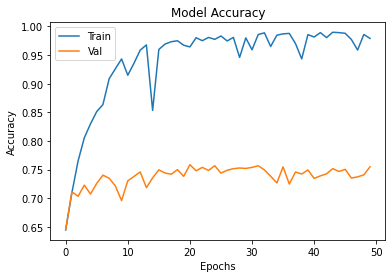

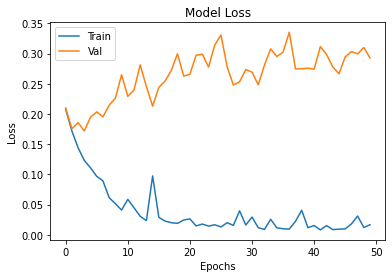

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 3, 3, 2048)        28513520  
                                                                 
 flatten_4 (Flatten)         (None, 18432)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               2359424   
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 30,890,488
Trainable params: 30,717,752
Non-trainable params: 172,736
_________________________________________________________________


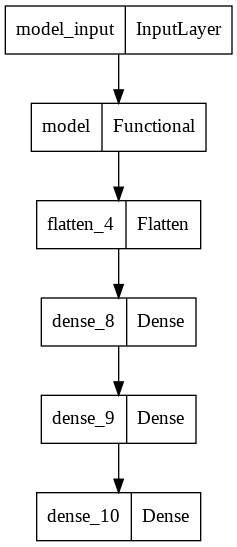

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_cnn)

COMPARING ACCURACIES

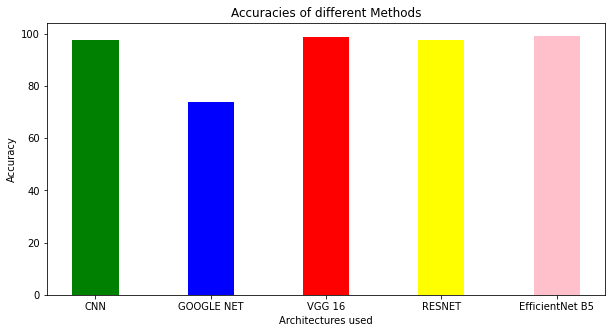

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = { 'CNN':97.63,'GOOGLE NET': 73.81, 'VGG 16':98.80 ,'RESNET': 97.52 ,'EfficientNet B5':99.14}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, data=data,color =['green','blue','red','yellow','pink'],
        width = 0.4)

plt.xlabel("Architectures used")
plt.ylabel("Accuracy")
plt.title("Accuracies of different Methods")
plt.show()

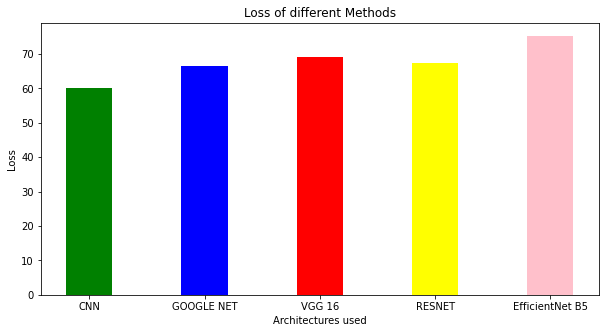

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = { 'CNN':60.22,'GOOGLE NET': 66.64, 'VGG 16':69.07 ,'RESNET': 67.47 ,'EfficientNet B5':75.28}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, data=data,color =['green','blue','red','yellow','pink'],
        width = 0.4)

plt.xlabel("Architectures used")
plt.ylabel("Loss")
plt.title("Loss of different Methods")
plt.show()